In [29]:
import yfinance as yf
import pandas as pd
import numpy as np
import quantstats as qs
import seaborn as sns
from pylab import mpl, plt
import matplotlib.pyplot as plt
import scipy.stats as scs
import statsmodels.api as sm
import math

In [52]:
# Télécharger les données des actifs en portefeuille : LVMH, Société Générale, Apple, Netflix, Eur/USD, Pétrole WTI, Hang Seng Index, MSCI Turkey
# Download portfolio asset data 

portfolio = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "TSLA"]
n_portfolio = len(portfolio)
portfolio_df = yf.download(portfolio, start = "2020-01-01", end = "2024-07-19")


[*********************100%%**********************]  7 of 7 completed


In [53]:
portfolio_df

Adj Close                                                  \
                  AAPL        AMZN        GOOG        META        MSFT   
Date                                                                     
2020-01-02   72.960464   94.900497   68.290787  209.349792  154.215652   
2020-01-03   72.251137   93.748497   67.955666  208.242081  152.295410   
2020-01-06   72.826843   95.143997   69.631264  212.164017  152.689087   
2020-01-07   72.484352   95.343002   69.587814  212.623062  151.296890   
2020-01-08   73.650360   94.598503   70.136192  214.778641  153.706802   
...                ...         ...         ...         ...         ...   
2024-07-12  230.539993  194.490005  186.779999  498.869995  453.549988   
2024-07-15  234.399994  192.720001  188.190002  496.160004  453.959991   
2024-07-16  234.820007  193.020004  185.500000  489.790009  449.519989   
2024-07-17  228.880005  187.929993  182.619995  461.989990  443.519989   
2024-07-18  224.179993  183.750000  179.220001  475.850006  440.369995   

                                         Close                          ...  \
                  NVDA        TSLA        AAPL        AMZN        GOOG  ...   
Date                                                                    ...   
2020-01-02    5.973632   28.684000   75.087502   94.900497   68.368500  ...   
2020-01-03    5.878020   29.534000   74.357498   93.748497   68.032997  ...   
2020-01-06    5.902670   30.102667   74.949997   95.143997   69.710503  ...   
2020-01-07    5.974130   31.270666   74.597504   95.343002   69.667000  ...   
2020-01-08    5.985336   32.809334   75.797501   94.598503   70.216003  ...   
...                ...         ...         ...         ...         ...  ...   
2024-07-12  129.240005  248.229996  230.539993  194.490005  186.779999  ...   
2024-07-15  128.440002  252.639999  234.399994  192.720001  188.190002  ...   
2024-07-16  126.360001  256.559998  234.820007  193.020004  185.500000  ...   
2024-07-17  117.989998  248.500000  228.880005  187.929993  182.619995  ...   
2024-07-18  121.089996  249.229996  224.179993  183.750000  179.220001  ...   

                  Open                             Volume                      \
                  MSFT        NVDA        TSLA       AAPL      AMZN      GOOG   
Date                                                                            
2020-01-02  158.779999    5.968750   28.299999  135480400  80580000  28132000   
2020-01-03  158.320007    5.877500   29.366667  146322800  75288000  23728000   
2020-01-06  157.080002    5.808000   29.364668  118387200  81236000  34646000   
2020-01-07  159.320007    5.955000   30.760000  108872000  80898000  30054000   
2020-01-08  158.929993    5.994000   31.580000  132079200  70160000  30560000   
...                ...         ...         ...        ...       ...       ...   
2024-07-12  454.329987  128.259995  235.800003   53008200  30554000  14429100   
2024-07-15  453.299988  130.559998  255.970001   62631300  40683200  12186000   
2024-07-16  454.220001  128.440002  255.309998   43234300  33994700  12760100   
2024-07-17  442.589996  121.349998  252.729996   57345900  48076100  17376600   
2024-07-18  444.339996  121.849998  251.089996   66034600  51043600  17877200   

                                                      
                META      MSFT       NVDA       TSLA  
Date                                                  
2020-01-02  12077100  22622100  237536000  142981500  
2020-01-03  11188400  21116200  205384000  266677500  
2020-01-06  17058900  20813700  262636000  151995000  
2020-01-07  14912400  21634100  314856000  268231500  
2020-01-08  13475000  27746500  277108000  467164500  
...              ...       ...        ...        ...  
2024-07-12  19712200  16311300  252103100  155694400  
2024-07-15  12539200  14429400  208326200  146912900  
2024-07-16  14075800  17175700  214769500  126332500  
2024-07-17  28076600  21778000  390086200  115584800  
2024-07-18  1926720

In [54]:
portfolio_df["Adj Close"].tail()

,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Date,,,,,,,
2024-07-12,230.539993,194.490005,186.779999,498.869995,453.549988,129.240005,248.229996
2024-07-15,234.399994,192.720001,188.190002,496.160004,453.959991,128.440002,252.639999
2024-07-16,234.820007,193.020004,185.500000,489.790009,449.519989,126.360001,256.559998
2024-07-17,228.880005,187.929993,182.619995,461.989990,443.519989,117.989998,248.500000
2024-07-18,224.179993,183.750000,179.220001,475.850006,440.369995,121.089996,249.229996


<Axes: xlabel='Date'>

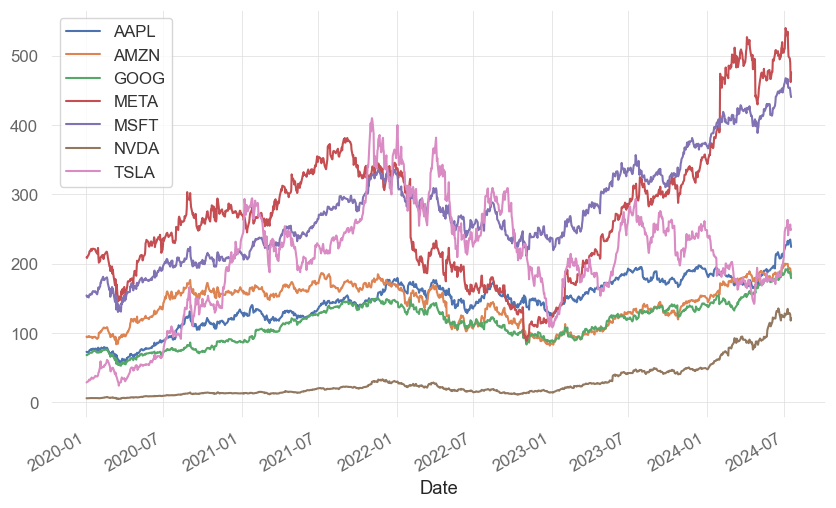

In [55]:
portfolio_df["Adj Close"].plot()

In [61]:
# Calculer les rendements des actifs 
# Calculate simple returns

portfolio_returns = portfolio_df["Adj Close"].pct_change().dropna()
portfolio_returns

,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Date,,,,,,,
2020-01-03,-0.009722,-0.012139,-0.004907,-0.005291,-0.012452,-0.016006,0.029633
2020-01-06,0.007968,0.014886,0.024657,0.018834,0.002585,0.004194,0.019255
2020-01-07,-0.004703,0.002092,-0.000624,0.002164,-0.009118,0.012106,0.038801
2020-01-08,0.016086,-0.007809,0.007880,0.010138,0.015928,0.001876,0.049205
2020-01-09,0.021241,0.004799,0.011044,0.014311,0.012493,0.010983,-0.021945
...,...,...,...,...,...,...,...
2024-07-12,0.013051,-0.002871,-0.002776,-0.026975,-0.002529,0.014443,0.029872
2024-07-15,0.016743,-0.009101,0.007549,-0.005432,0.000904,-0.006190,0.017766
2024-07-16,0.001792,0.001557,-0.014294,-0.012839,-0.009781,-0.016194,0.015516


<Axes: xlabel='Date'>

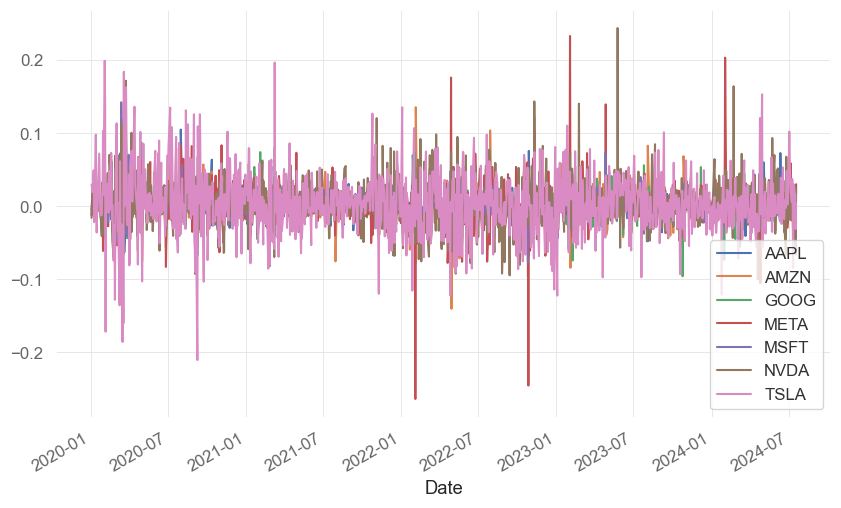

In [62]:
portfolio_returns.plot()

Text(0.5, 1.0, 'Daily Log Returns')

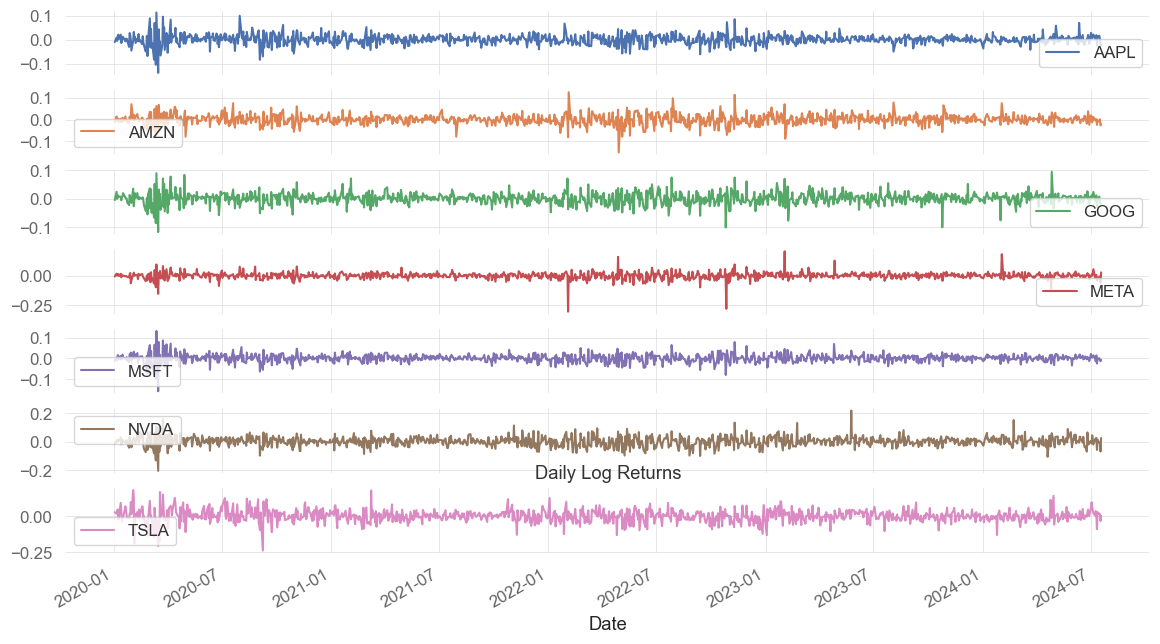

In [65]:
# Calcul des rendements logarithmiques 
# Calculation of logarithmic returns 

log_returns = np.log(portfolio_df["Adj Close"] / portfolio_df["Adj Close"].shift(1)).dropna()
log_returns.plot(subplots = True, figsize = (14,8))
plt.title('Daily Log Returns')

array([[<Axes: title={'center': 'AAPL'}>,
        <Axes: title={'center': 'AMZN'}>,
        <Axes: title={'center': 'GOOG'}>],
       [<Axes: title={'center': 'META'}>,
        <Axes: title={'center': 'MSFT'}>,
        <Axes: title={'center': 'NVDA'}>],
       [<Axes: title={'center': 'TSLA'}>, <Axes: >, <Axes: >]],
      dtype=object)

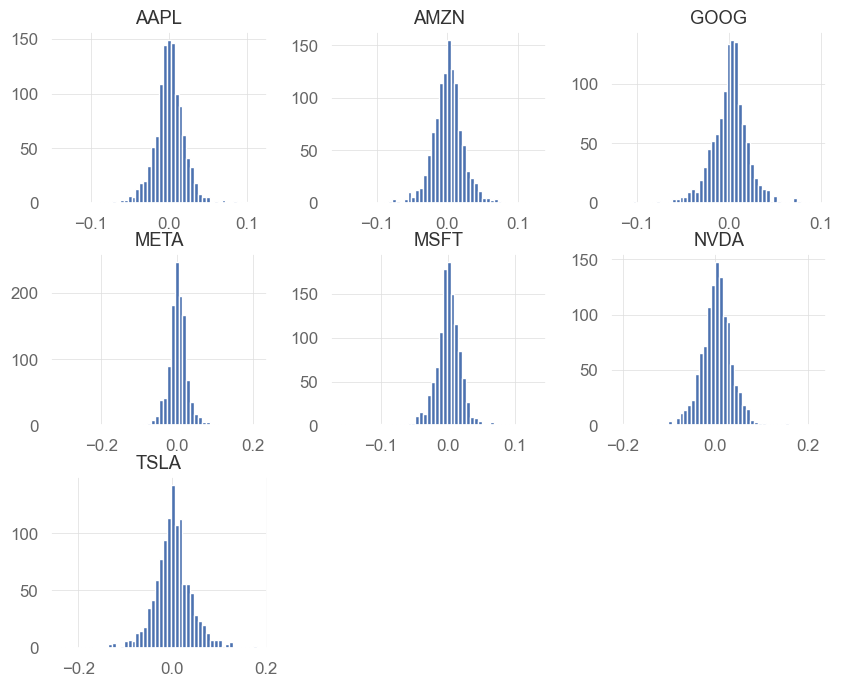

In [71]:
log_returns.hist(bins= 50, figsize=(10,8))

Text(0, 0.5, 'sample quantiles')

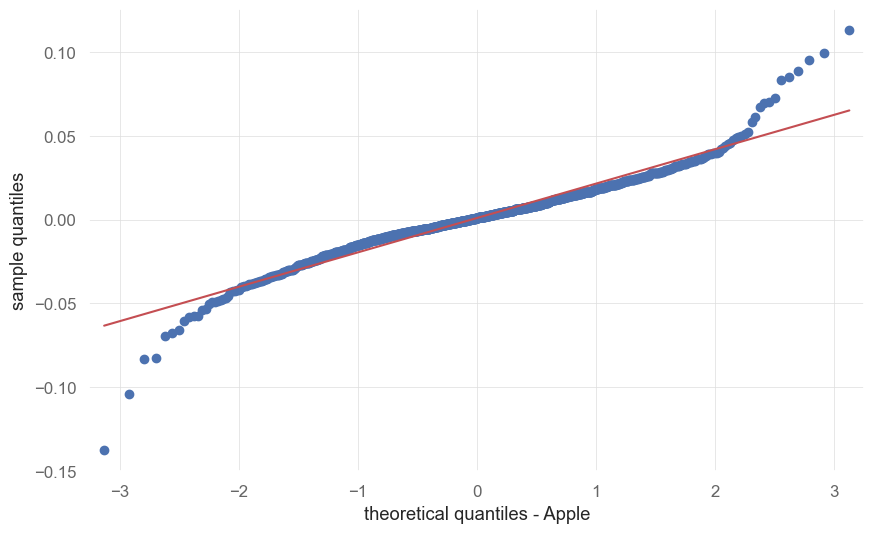

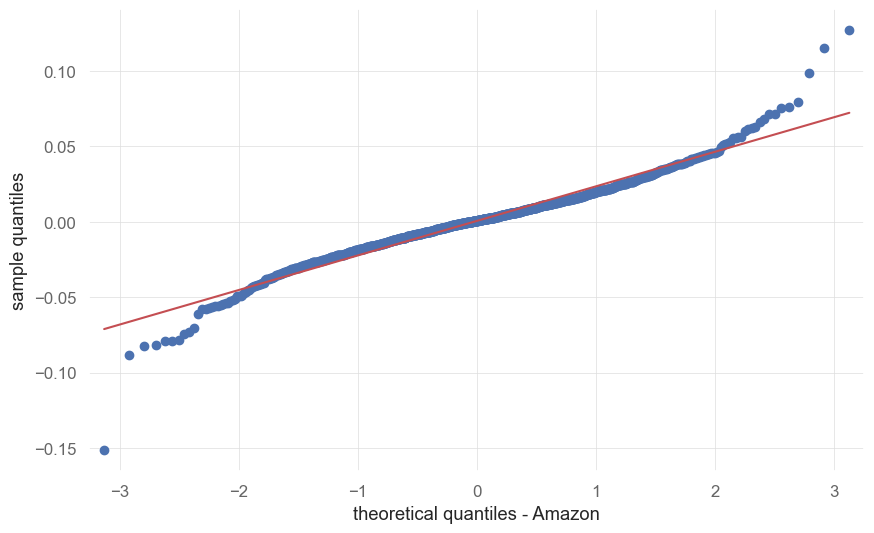

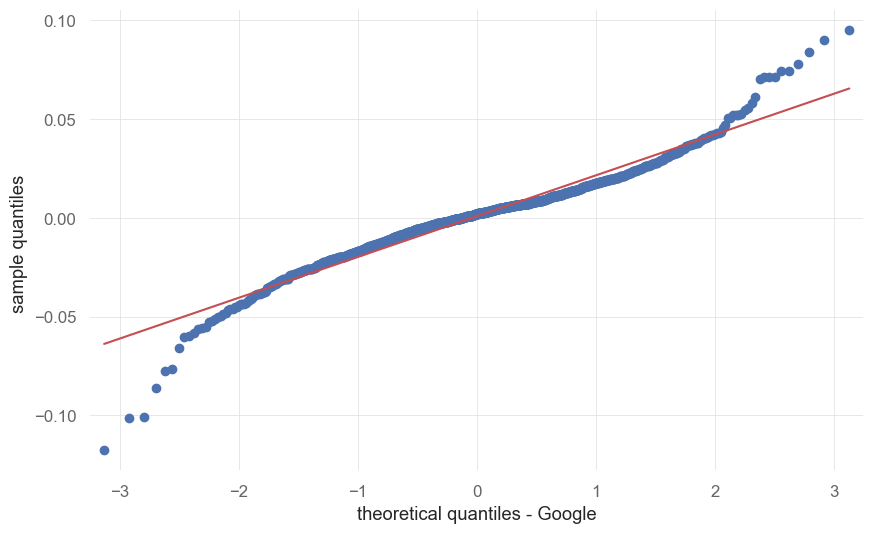

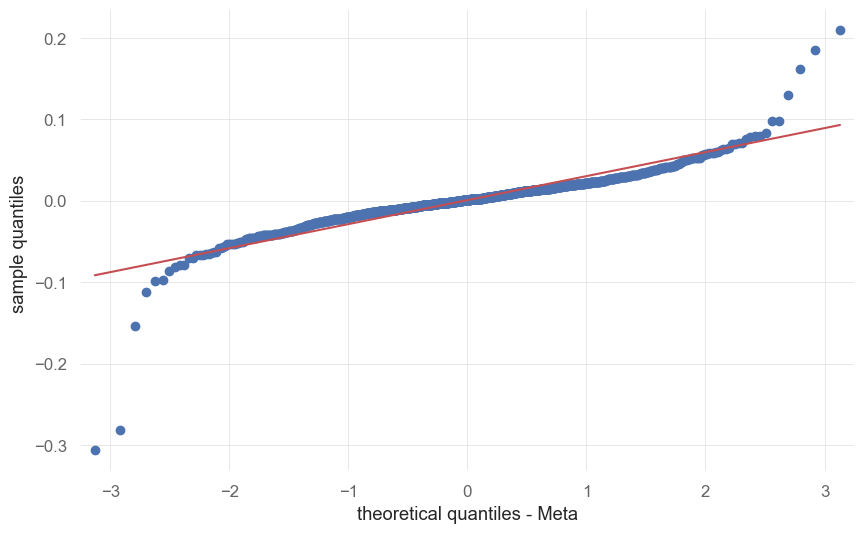

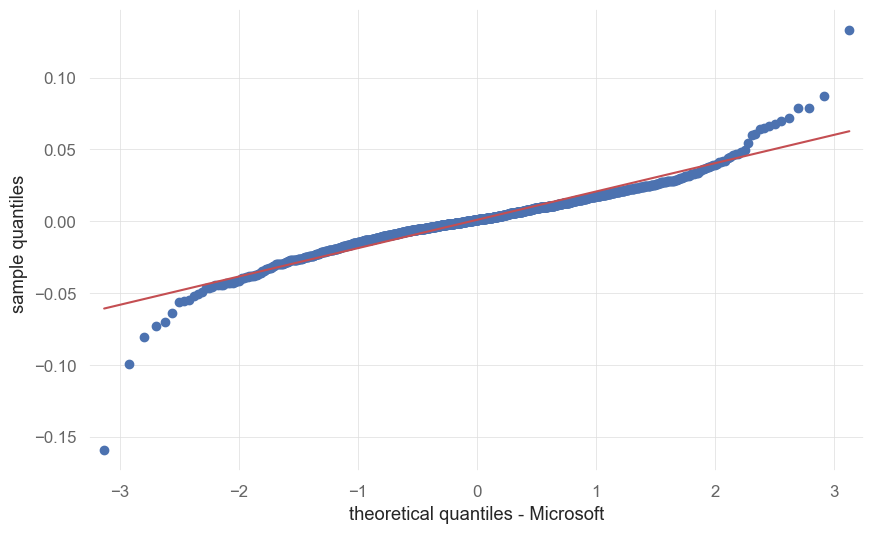

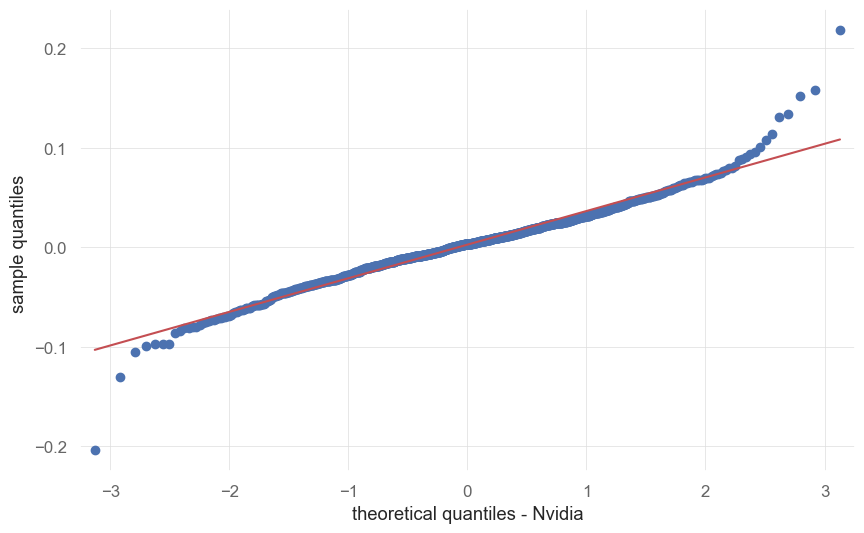

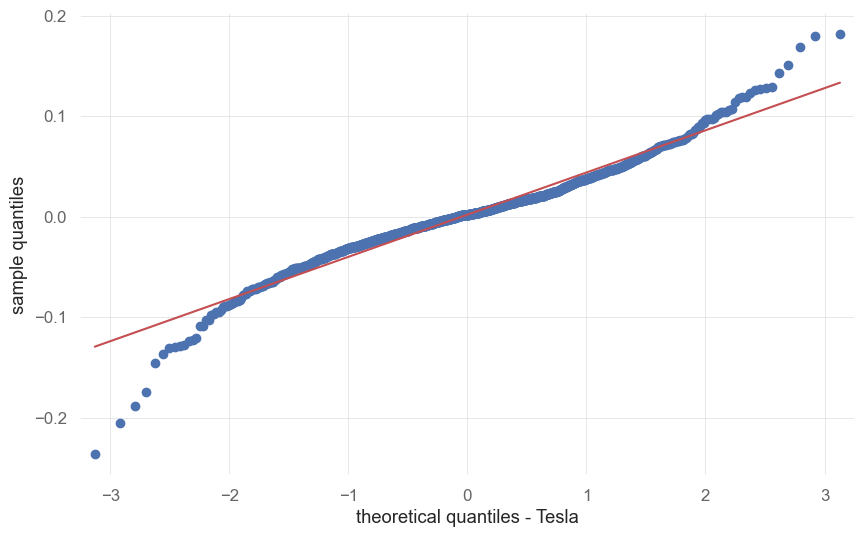

In [77]:
# Quantile Plot for Log Return

sm.qqplot(log_returns['AAPL'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles - Apple')
plt.ylabel('sample quantiles')

sm.qqplot(log_returns['AMZN'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles - Amazon')
plt.ylabel('sample quantiles')

sm.qqplot(log_returns['GOOG'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles - Google')
plt.ylabel('sample quantiles ')

sm.qqplot(log_returns['META'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles - Meta')
plt.ylabel('sample quantiles ')

sm.qqplot(log_returns['MSFT'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles - Microsoft')
plt.ylabel('sample quantiles ')

sm.qqplot(log_returns['NVDA'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles - Nvidia')
plt.ylabel('sample quantiles ')

sm.qqplot(log_returns['TSLA'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles - Tesla')
plt.ylabel('sample quantiles')

In [81]:
# Estimation de la moyenne annualisée des Log Return, de la covariance et correlation
# Estimated average annualized Log Return, covariance and correlation

log_returns.mean()*252

AAPL    0.247704
AMZN    0.145804
GOOG    0.212907
META    0.181188
MSFT    0.231536
NVDA    0.664022
TSLA    0.477087
dtype: float64

In [82]:
log_returns.cov()*252

,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
AAPL,0.106394,0.071939,0.071148,0.086322,0.077550,0.110386,0.110754
AMZN,0.071939,0.132243,0.078782,0.103783,0.077556,0.116582,0.105471
GOOG,0.071148,0.078782,0.107704,0.098802,0.077749,0.108169,0.087928
META,0.086322,0.103783,0.098802,0.219106,0.090291,0.136539,0.104684
MSFT,0.077550,0.077556,0.077749,0.090291,0.098087,0.118318,0.096365
NVDA,0.110386,0.116582,0.108169,0.136539,0.118318,0.287767,0.174284
TSLA,0.110754,0.105471,0.087928,0.104684,0.096365,0.174284,0.444348


In [83]:
log_returns.corr()

,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
AAPL,1.000000,0.606486,0.664648,0.565372,0.759129,0.630864,0.509378
AMZN,0.606486,1.000000,0.660123,0.609694,0.680966,0.597620,0.435097
GOOG,0.664648,0.660123,1.000000,0.643164,0.756439,0.614423,0.401929
META,0.565372,0.609694,0.643164,1.000000,0.615904,0.543761,0.335498
MSFT,0.759129,0.680966,0.756439,0.615904,1.000000,0.704249,0.461585
NVDA,0.630864,0.597620,0.614423,0.543761,0.704249,1.000000,0.487389
TSLA,0.509378,0.435097,0.401929,0.335498,0.461585,0.487389,1.000000


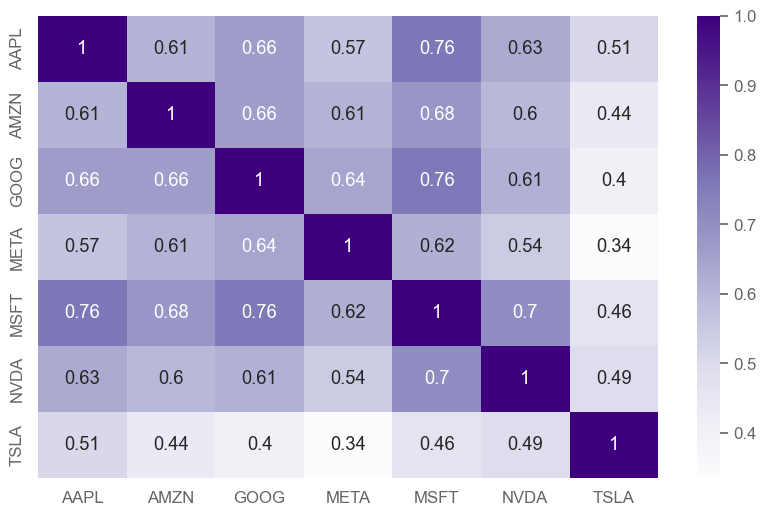

In [96]:
# Tableau de correlation
# Correlation matrice

sns.heatmap(log_returns.corr(), annot = True, cmap= "Purples")
plt.show()

In [98]:
# Définir le poids de chaque actif 
# Define weight for each asset

Portfolio_weights = n_portfolio * [1 / n_portfolio]
Portfolio_weights

[0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285]

In [101]:
# Rendement du portefeuille
# Portfolio returns

portfolio_returns = pd.Series(np.dot(Portfolio_weights, log_returns.T), index= log_returns.index)
portfolio_returns

Date
2020-01-03   -0.004524
2020-01-06    0.013081
2020-01-07    0.005693
2020-01-08    0.013109
2020-01-09    0.007450
                ...   
2024-07-12    0.003030
2024-07-15    0.003120
2024-07-16   -0.004962
2024-07-17   -0.034331
2024-07-18   -0.001534
Length: 1142, dtype: float64

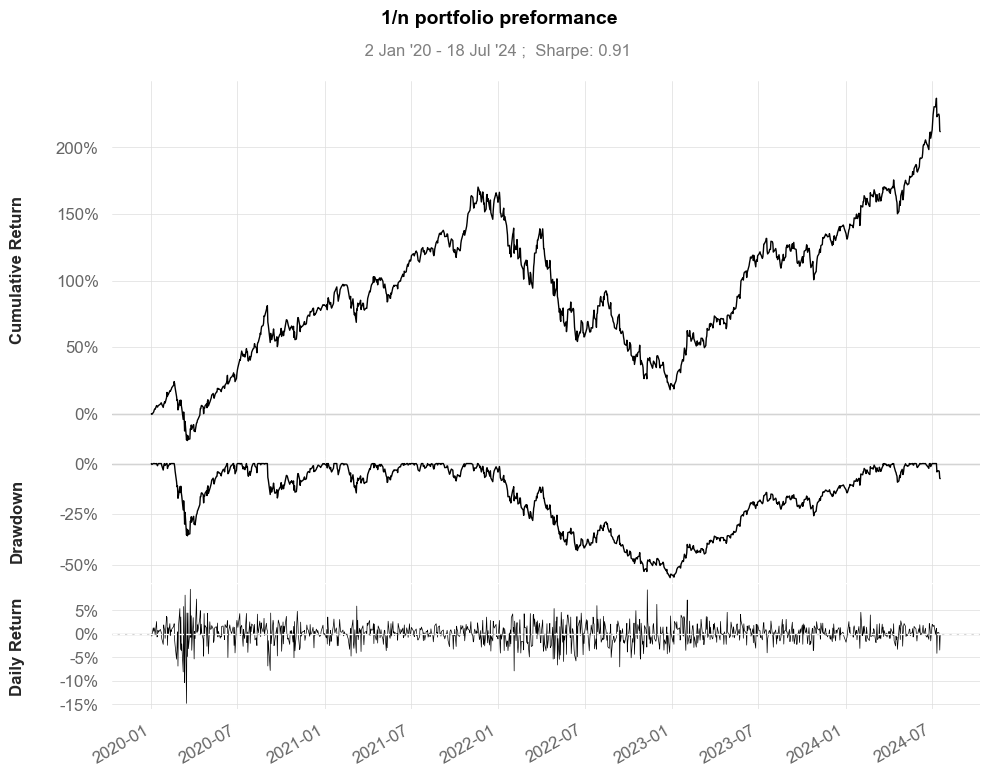

In [102]:
qs.plots.snapshot(portfolio_returns, title = "1/n portfolio preformance", grayscale = True)

In [105]:
# KPI du portefeuille 
# Portfolio metrics

qs.reports.metrics(portfolio_returns, mode = "basic", prepare_returns= False)

                    Strategy
------------------  ----------
Start Period        2020-01-03
End Period          2024-07-18
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   211.78%
CAGR﹪              18.87%

Sharpe              0.91
Prob. Sharpe Ratio  97.2%
Sortino             1.28
Sortino/√2          0.9
Omega               1.17

Max Drawdown        -56.31%
Longest DD Days     851

Gain/Pain Ratio     0.17
Gain/Pain (1M)      1.0

Payoff Ratio        0.97
Profit Factor       1.17
Common Sense Ratio  1.07
CPC Index           0.62
Tail Ratio          0.91
Outlier Win Ratio   3.26
Outlier Loss Ratio  3.41

MTD                 1.59%
3M                  19.78%
6M                  30.07%
YTD                 30.28%
1Y                  35.78%
3Y (ann.)           8.59%
5Y (ann.)           18.87%
10Y (ann.)          18.87%
All-time (ann.)     18.87%

Avg. Drawdown       -4.79%
Avg. Drawdown Days  30
Recovery Factor     2.48
Ulcer Index         0.23
Serenity Index      0.3

In [111]:
# Monte Carlo pour optimiser le portefeuille
# Using Monte Carlo simulation to optimize portfolio

In [112]:
weights = np.random.random(n_portfolio)
weights /= np.sum(weights)
weights
weights.sum()

1.0

In [121]:
# Rendement espere du portefeuille 
# Expcted portfolio return

expected_portfolio_return = np.sum(log_returns.mean()*weights)*252
expected_variance_return = np.dot(weights.T, np.dot(log_returns.cov()*252, weights))
expected_volatility_return = math.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights)))
print("Expected return is :", expected_portfolio_return, "Expected variance is :", expected_variance_return, "Expected volatility is :", expected_volatility_return)

Expected return is : 0.314533402084111 Expected variance is : 0.11327107351574181 Expected volatility is : 0.33655768230088257


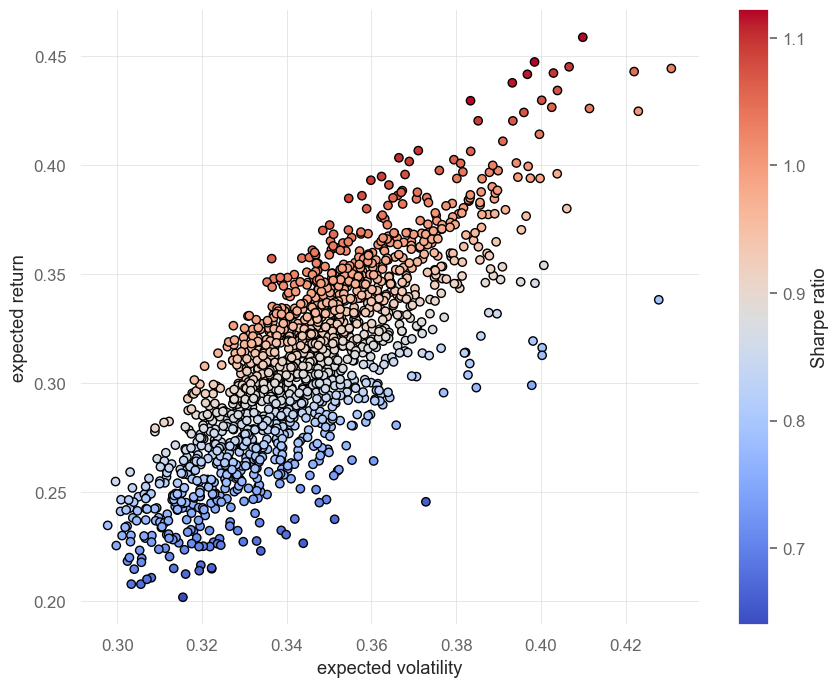

In [125]:
# Monte Carlo Simulation and Efficient Frontier 

prets = []
pvols = []
for  p in range (1500):
     weights = np.random.random(n_portfolio)
     weights /= np.sum(weights)
     prets.append(np.sum(log_returns.mean()*weights)*252)
     pvols.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

plt.figure(figsize=(10,8))
plt.scatter(pvols, prets, c=prets / pvols, marker = 'o', cmap= 'coolwarm', edgecolors= "black")
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')